In [1]:
import numpy as np
import json
import urllib.request as Request
import pandas as pd
import data_collecter_sohu


In [2]:
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('data/20171229/002501_20101117_20171229.csv')
df = df.set_index('date')


In [4]:
df_=df[::-1]
df_=df_.assign(vap=df_['amount']*100/df_['volume'])
rolling_3=df_[['amount','volume']].rolling(3).sum()
rolling_5=df_[['amount','volume']].rolling(5).sum()
df_=df_.assign(vap_3=rolling_3['amount']*100/rolling_3['volume'],
           vap_5=rolling_5['amount']*100/rolling_5['volume'])
plt_df=df_.loc['2017-01-04':,['close','p_change_rate','vap','vap_3','vap_5']]

In [5]:
plt_vap=plt_df.vap.values
plt_vap_3=plt_df.vap_3.values
plt_vap_5=plt_df.vap_5.values
plt_close=plt_df.close.values
plt_p_change_rate=plt_df.p_change_rate.values
xticks=plt_df.vap.index.values
print(plt_vap.size,plt_close.size,xticks.size)


242 242 242


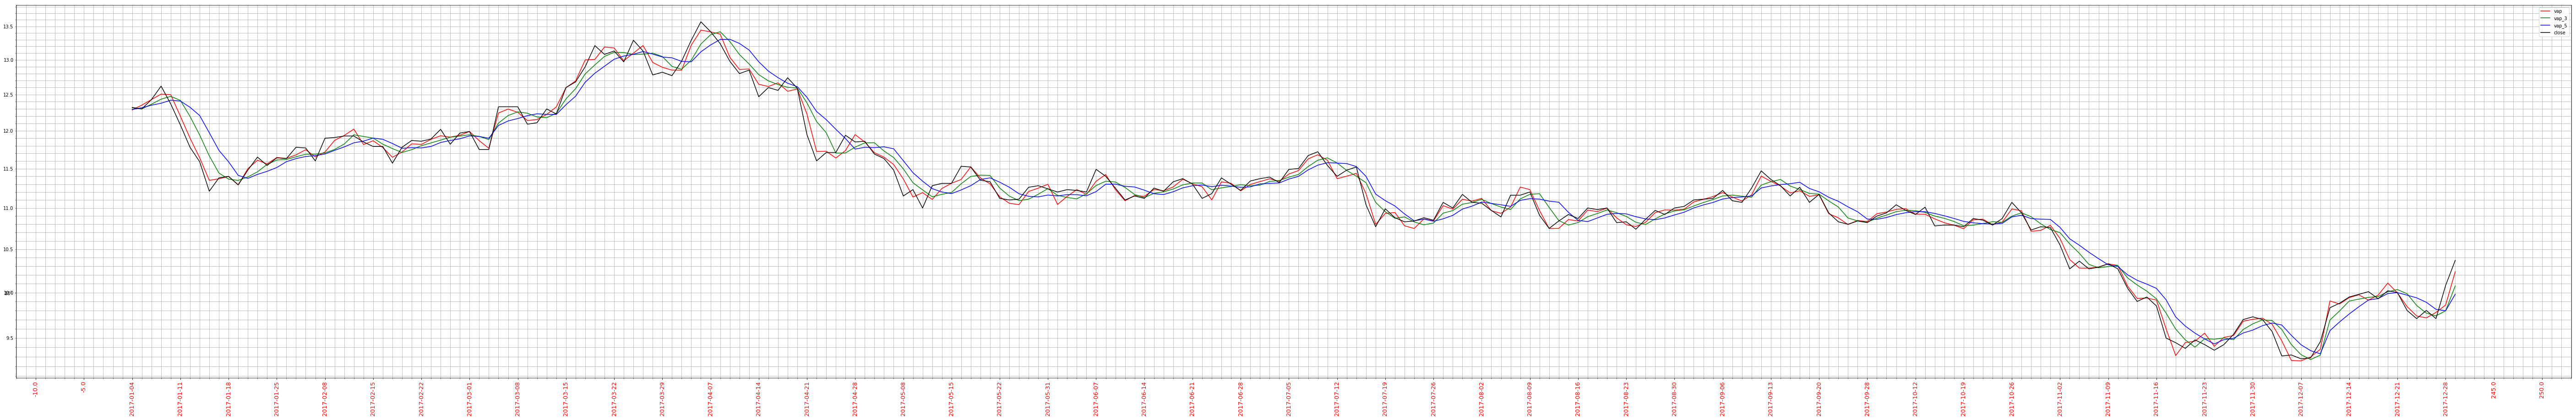

In [15]:
def xformatter(v,pos):
    if v >= xticks.size or v<0:
        return str(v)
    return xticks[int(v)]

def yformatter(v,pos):
    if pos%5==0:
        return str(v)
    return ''

from matplotlib.ticker import MultipleLocator, FuncFormatter
plt.close()
fig=plt.figure(figsize=(100,15))
# plt_df.plot()
plt.semilogy([i for i in range(plt_vap.size)],plt_vap,'r',label='vap'),
plt.semilogy([i for i in range(plt_vap_3.size)],plt_vap_3,'g',label='vap_3')
plt.semilogy([i for i in range(plt_vap_5.size)],plt_vap_5,'b',label='vap_5')
plt.semilogy([i for i in range(plt_close.size)],plt_close,'k',label='close')
axis = plt.gca().xaxis
yaxis = plt.gca().yaxis
for label in axis.get_ticklabels():
    label.set_color("red")
    label.set_rotation(90)
    label.set_fontsize(13)
axis.set_major_formatter(FuncFormatter(xformatter))
axis.set_major_locator(MultipleLocator(5))
axis.set_minor_locator(MultipleLocator(1))
# yaxis.set_major_formatter(FuncFormatter(yformatter))
# yaxis.set_major_locator(MultipleLocator(1))
yaxis.set_minor_locator(MultipleLocator(0.1))
yaxis.set_minor_formatter(FuncFormatter(yformatter))

plt.grid(which='minor')
plt.legend()
plt.show()

In [32]:
i=df.index.get_loc('2015-01-12')
df[i+3:i-3:-1]


,open,close,price_change,p_change_rate,low,high,volume,amount,turnover,index_open,index_close,index_price_change,index_p_change_rate,index_low,index_high,index_volume,index_amount
date,,,,,,,,,,,,,,,,,
2015-01-07,9.47,9.34,-0.14,-1.48,9.26,9.63,1576930.0,148150.94,3.19,11612.73,11613.36,-54.61,-0.47,11505.03,11714.78,289928320.0,24625286.0
2015-01-08,9.32,9.53,0.19,2.03,9.29,9.84,2836742.0,271064.56,5.74,11624.59,11465.14,-148.22,-1.28,11371.92,11656.71,283567776.0,23896822.0
2015-01-09,9.48,9.37,-0.16,-1.68,9.30,9.68,2069356.0,197218.52,4.19,11424.53,11324.76,-140.38,-1.22,11313.25,11738.25,296512384.0,24403282.0
2015-01-12,9.30,9.07,-0.30,-3.20,8.91,9.34,1400166.0,127443.41,2.83,11279.73,11285.18,-39.58,-0.35,11116.06,11376.09,231734256.0,20410998.0
2015-01-13,9.05,9.12,0.05,0.55,9.02,9.20,969865.0,88381.13,1.96,11250.88,11355.81,70.63,0.63,11244.42,11418.45,198169920.0,19666078.0
2015-01-14,9.10,9.03,-0.09,-0.99,8.97,9.26,987629.0,90149.26,2.00,11366.95,11237.78,-118.03,-1.04,11153.17,11429.31,198195776.0,19044264.0


In [48]:
i=df_.index.get_loc('2017-10-16')
snippet=df_.iloc[i-3:i+3][['open','close','vap','vap_3','vap_5','amount','volume']]
snippet

,open,close,vap,vap_3,vap_5,amount,volume
date,,,,,,,
2017-10-11,14.00,14.20,14.224744,13.999690,13.644126,182079.42,1280019.0
2017-10-12,14.05,14.09,14.069587,14.143322,13.855824,109115.70,775543.0
2017-10-13,14.09,14.39,14.476381,14.280106,14.103024,172683.97,1192867.0
2017-10-16,14.40,13.92,14.132425,14.253171,14.211723,144996.84,1025987.0
2017-10-17,13.95,14.06,14.057397,14.248345,14.215083,112698.15,801700.0
2017-10-18,14.06,14.00,14.163096,14.117580,14.204007,102744.76,725440.0


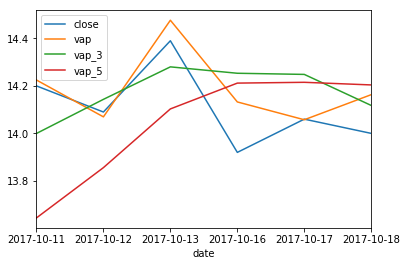

In [65]:
plt.close()
plt.figure(figsize=(200,4))
snippet.iloc[:,[1,2,3,4]].plot()
plt.show()